Dataset shape: (284807, 31)

Column names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values in each column:
 0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\damai\AppData\Local\Temp\ipykernel_22172\1609446019.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


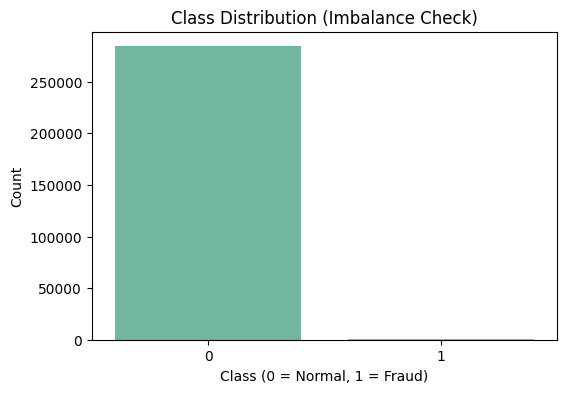

Fraud to Normal Ratio: 0.001730


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Load dataset -----
data = pd.read_csv("creditcard.csv")

# ----- Basic dataset info -----
print("Dataset shape:", data.shape)
print("\nColumn names:", data.columns.tolist())

# ----- Check for missing values -----
# Total missing values; handle if any are present
print("\nMissing values in dataset:", data.isnull().sum().sum())

# ----- Preview first few rows -----
display(data.head())

# ----- Plot class distribution to check imbalance -----
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Class Distribution (Imbalance Check)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

# ----- Compute and display fraud ratio -----
fraud_ratio = data['Class'].value_counts()[1] / data['Class'].value_counts()[0]
print(f"Fraud to Normal Ratio: {fraud_ratio:.6f}")

Training shape: (199364, 29)
Testing shape: (85443, 29)

Class distribution before SMOTE:
Class
0    199020
1       344
Name: count, dtype: int64

Class distribution after SMOTE:
Class
0    199020
1    199020
Name: count, dtype: int64


C:\Users\damai\AppData\Local\Temp\ipykernel_22172\3658449317.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="Set2")


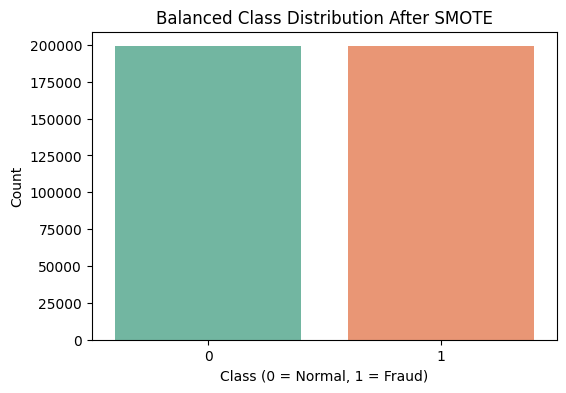

In [ ]:
# ----- Feature preparation and train-test split for credit card fraud dataset -----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Drop 'Time' column (not useful for modeling)
data = data.drop(columns=['Time'])

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize 'Amount' to align with PCA-scaled features
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Split into train/test sets (70/30) while preserving class ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")
print("\nClass distribution before SMOTE:")
print(y_train.value_counts())

# ----- Apply SMOTE to balance classes in training set -----
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("\nClass distribution after SMOTE:")
print(y_resampled.value_counts())

# ----- Visualize balanced classes after SMOTE -----
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, palette="Set2")
plt.title("Balanced Class Distribution After SMOTE")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import numpy as np

# ----- Train XGBoost Classifier (Pre-Tuned) -----
xgb_baseline = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,
    scale_pos_weight=(len(y_resampled) - sum(y_resampled)) / sum(y_resampled),  # handle imbalance
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='hist',
    n_jobs=-1
)
xgb_baseline.fit(X_resampled, y_resampled)

# ----- Evaluate XGBoost -----
y_pred_xgb_pre = xgb_baseline.predict(X_test)
y_proba_xgb_pre = xgb_baseline.predict_proba(X_test)[:, 1]

xgb_pre_acc = accuracy_score(y_test, y_pred_xgb_pre)
xgb_pre_prec = precision_score(y_test, y_pred_xgb_pre)
xgb_pre_rec = recall_score(y_test, y_pred_xgb_pre)
xgb_pre_f1 = f1_score(y_test, y_pred_xgb_pre)
xgb_pre_auc = roc_auc_score(y_test, y_proba_xgb_pre)

print("\nPre-Tuned XGBoost Performance")
print(f"Accuracy : {xgb_pre_acc:.4f}")
print(f"Precision: {xgb_pre_prec:.4f}")
print(f"Recall   : {xgb_pre_rec:.4f}")
print(f"F1-Score : {xgb_pre_f1:.4f}")
print(f"ROC-AUC  : {xgb_pre_auc:.4f}")

# ----- Prepare CNN Input (expand dims for Conv1D) -----
X_train_cnn = np.expand_dims(X_resampled.values, axis=2)
X_test_cnn = np.expand_dims(X_test.values, axis=2)

# ----- Train 1D CNN Model (Pre-Tuned) -----
cnn_baseline = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

cnn_baseline.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
cnn_baseline.fit(
    X_train_cnn, y_resampled,
    epochs=15,
    batch_size=256,
    validation_split=0.2,
    verbose=1
)

# ----- Evaluate CNN -----
y_proba_cnn_pre = cnn_baseline.predict(X_test_cnn).flatten()
y_pred_cnn_pre = (y_proba_cnn_pre > 0.5).astype(int)

cnn_pre_acc = accuracy_score(y_test, y_pred_cnn_pre)
cnn_pre_prec = precision_score(y_test, y_pred_cnn_pre)
cnn_pre_rec = recall_score(y_test, y_pred_cnn_pre)
cnn_pre_f1 = f1_score(y_test, y_pred_cnn_pre)
cnn_pre_auc = roc_auc_score(y_test, y_proba_cnn_pre)

print("\nPre-Tuned CNN Performance")
print(f"Accuracy : {cnn_pre_acc:.4f}")
print(f"Precision: {cnn_pre_prec:.4f}")
print(f"Recall   : {cnn_pre_rec:.4f}")
print(f"F1-Score : {cnn_pre_f1:.4f}")
print(f"ROC-AUC  : {cnn_pre_auc:.4f}")

c:\Users\damai\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:08:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Pre-Tuned XGBoost Performance
Accuracy : 0.9990
Precision: 0.6595
Recall   : 0.8243
F1-Score : 0.7327
ROC-AUC  : 0.9737
Epoch 1/15


c:\Users\damai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1244/1244 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9727 - loss: 0.0721 - val_accuracy: 0.9952 - val_loss: 0.0223
Epoch 2/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9924 - loss: 0.0227 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 3/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 4/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9969 - loss: 0.0111 - val_accuracy: 0.9998 - val_loss: 0.0050
Epoch 5/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9975 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9978 - loss: 0.0086 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 7/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9982 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 1.6466e-04
Epoch 8/15
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9981 - loss: 0.0067 - v

Pre-Tuned Model Performance Summary

XGBoost (Pre-Tuned):
  Accuracy : 0.9990
  Precision: 0.6595
  Recall   : 0.8243
  F1-Score : 0.7327
  ROC-AUC  : 0.9737

1D CNN (Pre-Tuned):
  Accuracy : 0.9985
  Precision: 0.5368
  Recall   : 0.8378
  F1-Score : 0.6544
  ROC-AUC  : 0.9615



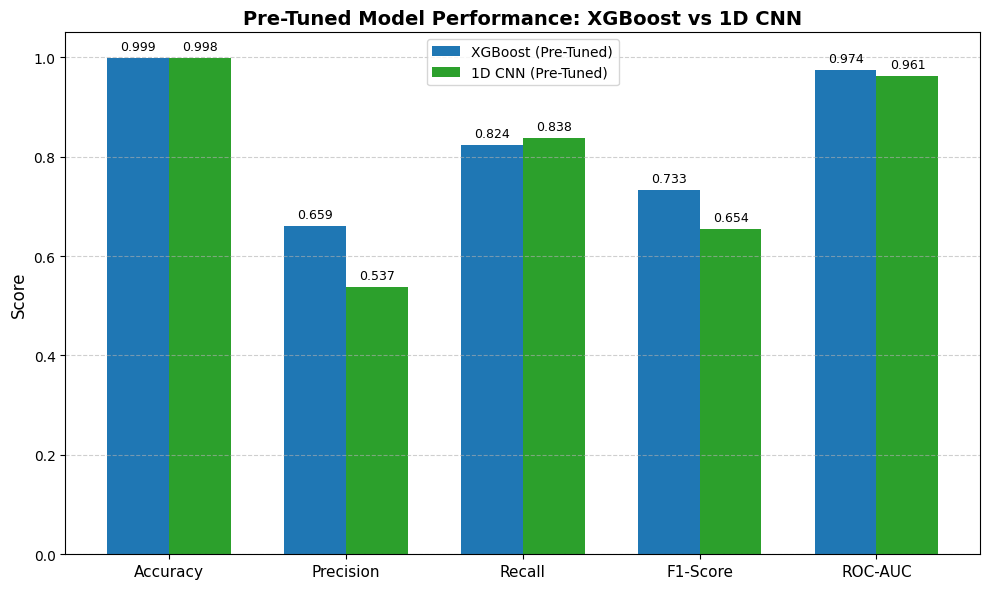

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np

# ----- Display pre-tuned results summary -----
print("Pre-Tuned Model Performance Summary\n")

print("XGBoost (Pre-Tuned):")
print(f"Accuracy : {xgb_pre_acc:.4f}")
print(f"Precision: {xgb_pre_prec:.4f}")
print(f"Recall   : {xgb_pre_rec:.4f}")
print(f"F1-Score : {xgb_pre_f1:.4f}")
print(f"ROC-AUC  : {xgb_pre_auc:.4f}\n")

print("1D CNN (Pre-Tuned):")
print(f"Accuracy : {cnn_pre_acc:.4f}")
print(f"Precision: {cnn_pre_prec:.4f}")
print(f"Recall   : {cnn_pre_rec:.4f}")
print(f"F1-Score : {cnn_pre_f1:.4f}")
print(f"ROC-AUC  : {cnn_pre_auc:.4f}\n")

# ----- Prepare metrics for visualization -----
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
xgb_scores = [xgb_pre_acc, xgb_pre_prec, xgb_pre_rec, xgb_pre_f1, xgb_pre_auc]
cnn_scores = [cnn_pre_acc, cnn_pre_prec, cnn_pre_rec, cnn_pre_f1, cnn_pre_auc]

# ----- Plot grouped bar chart comparing XGBoost and CNN -----
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, xgb_scores, width, label='XGBoost (Pre-Tuned)', color='#1f77b4')
bars2 = plt.bar(x + width/2, cnn_scores, width, label='1D CNN (Pre-Tuned)', color='#2ca02c')

# ----- Annotate bars with numeric values -----
for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
            f"{bar.get_height():.3f}", ha='center', va='bottom', fontsize=9
        )

# ----- Customize chart appearance -----
plt.title("Pre-Tuned Model Performance: XGBoost vs 1D CNN", fontsize=14, weight='bold')
plt.ylabel("Score", fontsize=12)
plt.xticks(x, metrics, fontsize=11)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC  
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# ----- Prepare CNN input -----
X_train_cnn = np.expand_dims(X_resampled.values, axis=2)
X_test_cnn = np.expand_dims(X_test.values, axis=2)
y_resampled_cnn = y_resampled.astype(np.float32)

# ----- Define CNN model builder for hyperparameter tuning -----
def build_cnn_model(hp):
    model = Sequential([
        Conv1D(
            filters=hp.Choice('filters_1', [32, 64, 128]),
            kernel_size=hp.Choice('kernel_size_1', [3, 5]),
            activation='relu',
            input_shape=(X_train_cnn.shape[1], 1)
        ),
        MaxPooling1D(pool_size=2),
        Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)),

        Conv1D(
            filters=hp.Choice('filters_2', [64, 128]),
            kernel_size=hp.Choice('kernel_size_2', [3, 5]),
            activation='relu'
        ),
        MaxPooling1D(pool_size=2),
        Flatten(),

        Dense(hp.Choice('dense_units', [64, 128, 256]), activation='relu'),
        Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[AUC(name='auc')]
    )
    return model

# ----- Initialize Keras Tuner -----
tuner = kt.RandomSearch(
    build_cnn_model,
    objective='auc', 
    max_trials=8,
    executions_per_trial=1,
    overwrite=True,
    directory='cnn_tuning',
    project_name='improved_cnn'
)

# ----- EarlyStopping callback to prevent overfitting -----
es = EarlyStopping(
    monitor='auc',  
    patience=5,
    mode='max',
    restore_best_weights=True
)

# ----- Hyperparameter search -----
tuner.search(
    X_train_cnn, y_resampled_cnn,
    epochs=30,
    batch_size=256,
    validation_split=0.2,
    callbacks=[es],
    verbose=1
)

# ----- Retrieve best hyperparameters and model -----
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_cnn = tuner.get_best_models(num_models=1)[0]

print("\nBest Hyperparameters for CNN:")
for k, v in best_hps.values.items():
    print(f"  {k}: {v}")

# ----- Evaluate tuned CNN on test set -----
y_proba_cnn_best = best_cnn.predict(X_test_cnn).flatten()
y_pred_cnn_best = (y_proba_cnn_best > 0.5).astype(int)

cnn_acc_post = accuracy_score(y_test, y_pred_cnn_best)
cnn_prec_post = precision_score(y_test, y_pred_cnn_best)
cnn_rec_post = recall_score(y_test, y_pred_cnn_best)
cnn_f1_post = f1_score(y_test, y_pred_cnn_best)
cnn_auc_post = roc_auc_score(y_test, y_proba_cnn_best)

print("\nHypertuned CNN Performance")
print(f"Accuracy : {cnn_acc_post:.4f}")
print(f"Precision: {cnn_prec_post:.4f}")
print(f"Recall   : {cnn_rec_post:.4f}")
print(f"F1-Score : {cnn_f1_post:.4f}")
print(f"ROC-AUC  : {cnn_auc_post:.4f}")

Trial 8 Complete [00h 01m 08s]
auc: 0.9991752505302429

Best auc So Far: 0.9998793005943298
Total elapsed time: 00h 21m 56s

Best Hyperparameters for CNN:
  filters_1: 32
  kernel_size_1: 5
  dropout_1: 0.4
  filters_2: 128
  kernel_size_2: 3
  dense_units: 128
  dropout_2: 0.2
  learning_rate: 0.001
  57/2671 ━━━━━━━━━━━━━━━━━━━━ 2s 910us/step 

c:\Users\damai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

Hypertuned CNN Performance
Accuracy : 0.9985
Precision: 0.5348
Recall   : 0.8311
F1-Score : 0.6508
ROC-AUC  : 0.9728


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
import numpy as np, time

# ----- Define dynamic scale_pos_weight to handle class imbalance -----
scale_weight = (len(y_resampled) - sum(y_resampled)) / sum(y_resampled)

# ----- Define hyperparameter search space -----
param_dist_xgb = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 0.5, 1],
    'scale_pos_weight': [scale_weight * i for i in [0.5, 1, 2]]
}

# ----- Initialize base XGBoost classifier -----
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    tree_method='hist',
    random_state=42,
    n_jobs=-1
)

# ----- RandomizedSearchCV for hyperparameter tuning -----
xgb_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist_xgb,
    n_iter=50,          
    scoring='roc_auc',  
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)
xgb_search.fit(X_resampled, y_resampled)

# ----- Display best hyperparameters -----
print("Best XGBoost Parameters:")
for p, v in xgb_search.best_params_.items():
    print(f"  {p}: {v}")

# ----- Retrieve best tuned model -----
best_xgb_model = xgb_search.best_estimator_

# ----- Evaluate tuned XGBoost on test set -----
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred_xgb_tuned)
prec = precision_score(y_test, y_pred_xgb_tuned)
rec = recall_score(y_test, y_pred_xgb_tuned)
f1 = f1_score(y_test, y_pred_xgb_tuned)
auc = roc_auc_score(y_test, y_proba_xgb_tuned)

print("\nTuned XGBoost Performance")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

Starting XGBoost RandomizedSearchCV...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\damai\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:51:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost tuning completed in 1120.26 seconds.

Best XGBoost Parameters:
  subsample: 0.6
  scale_pos_weight: 2.0
  n_estimators: 400
  max_depth: 10
  learning_rate: 0.2
  gamma: 0.25
  colsample_bytree: 0.8

Tuned XGBoost Performance
Accuracy : 0.9993
Precision: 0.8067
Recall   : 0.8176
F1-Score : 0.8121
ROC-AUC  : 0.9693



Model Comparison: Pre vs Post Tuned
   Metric  XGBoost (Pre-Tuned)  XGBoost (Post-Tuned)  CNN (Pre-Tuned)  CNN (Post-Tuned)
 Accuracy               0.9990                0.9993           0.9985            0.9985
Precision               0.6595                0.8067           0.5368            0.5348
   Recall               0.8243                0.8176           0.8378            0.8311
 F1-Score               0.7327                0.8121           0.6544            0.6508
  ROC-AUC               0.9737                0.9693           0.9615            0.9728


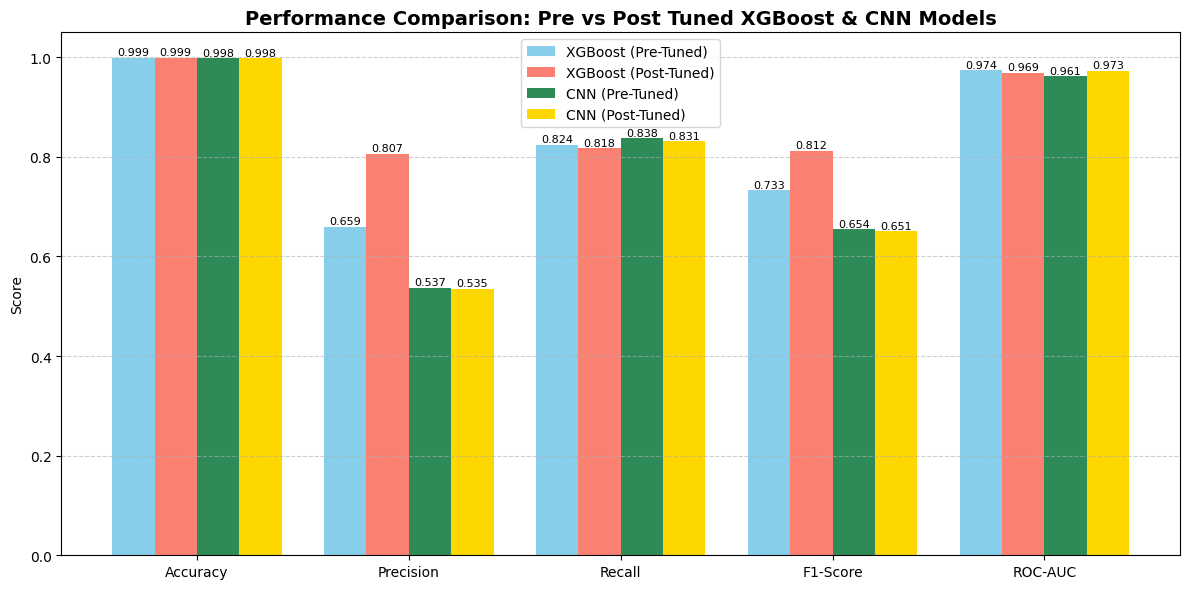

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ----- Store post-tuned XGBoost metrics -----
xgb_acc_post = acc
xgb_prec_post = prec
xgb_rec_post = rec
xgb_f1_post = f1
xgb_auc_post = auc

# ----- Define metric names -----
metric_names = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

# ----- Pre-tuned metrics (already computed) -----
xgb_pre_metrics = [xgb_pre_acc, xgb_pre_prec, xgb_pre_rec, xgb_pre_f1, xgb_pre_auc]
cnn_pre_metrics = [cnn_pre_acc, cnn_pre_prec, cnn_pre_rec, cnn_pre_f1, cnn_pre_auc]

# ----- Post-tuned metrics (hypertuned results) -----
xgb_post_metrics = [xgb_acc_post, xgb_prec_post, xgb_rec_post, xgb_f1_post, xgb_auc_post]
cnn_post_metrics = [cnn_acc_post, cnn_prec_post, cnn_rec_post, cnn_f1_post, cnn_auc_post]

# ----- Create comparison DataFrame -----
comparison_df = pd.DataFrame({
    "Metric": metric_names,
    "XGBoost (Pre-Tuned)": np.round(xgb_pre_metrics, 4),
    "XGBoost (Post-Tuned)": np.round(xgb_post_metrics, 4),
    "CNN (Pre-Tuned)": np.round(cnn_pre_metrics, 4),
    "CNN (Post-Tuned)": np.round(cnn_post_metrics, 4)
})

print("\nModel Comparison: Pre vs Post Tuned")
print(comparison_df.to_string(index=False))

# ----- Plot grouped bar chart for metrics comparison -----
x = np.arange(len(metric_names))
width = 0.2

plt.figure(figsize=(12,6))

plt.bar(x - 1.5*width, xgb_pre_metrics, width, label='XGBoost (Pre-Tuned)', color='skyblue')
plt.bar(x - 0.5*width, xgb_post_metrics, width, label='XGBoost (Post-Tuned)', color='salmon')
plt.bar(x + 0.5*width, cnn_pre_metrics, width, label='CNN (Pre-Tuned)', color='seagreen')
plt.bar(x + 1.5*width, cnn_post_metrics, width, label='CNN (Post-Tuned)', color='gold')

# ----- Annotate bars with metric values -----
for i, (group, offset) in enumerate([
    (xgb_pre_metrics, -1.5*width),
    (xgb_post_metrics, -0.5*width),
    (cnn_pre_metrics, 0.5*width),
    (cnn_post_metrics, 1.5*width)
]):
    for j, v in enumerate(group):
        plt.text(j + offset, v + 0.005, f"{v:.3f}", ha='center', fontsize=8)

# ----- Finalize plot -----
plt.xticks(x, metric_names)
plt.ylabel("Score")
plt.title("Performance Comparison: Pre vs Post Tuned XGBoost & CNN Models", fontsize=14, weight='bold')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Post-Tuned Models vs Average Ensemble
   Metric  XGBoost (Post-Tuned)  CNN (Post-Tuned)  Ensemble (Average)
 Accuracy              0.999345          0.998455            0.999228
Precision              0.806667          0.534783            0.750000
   Recall              0.817568          0.831081            0.831081
 F1-Score              0.812081          0.650794            0.788462
  ROC-AUC              0.969283          0.972754            0.969290


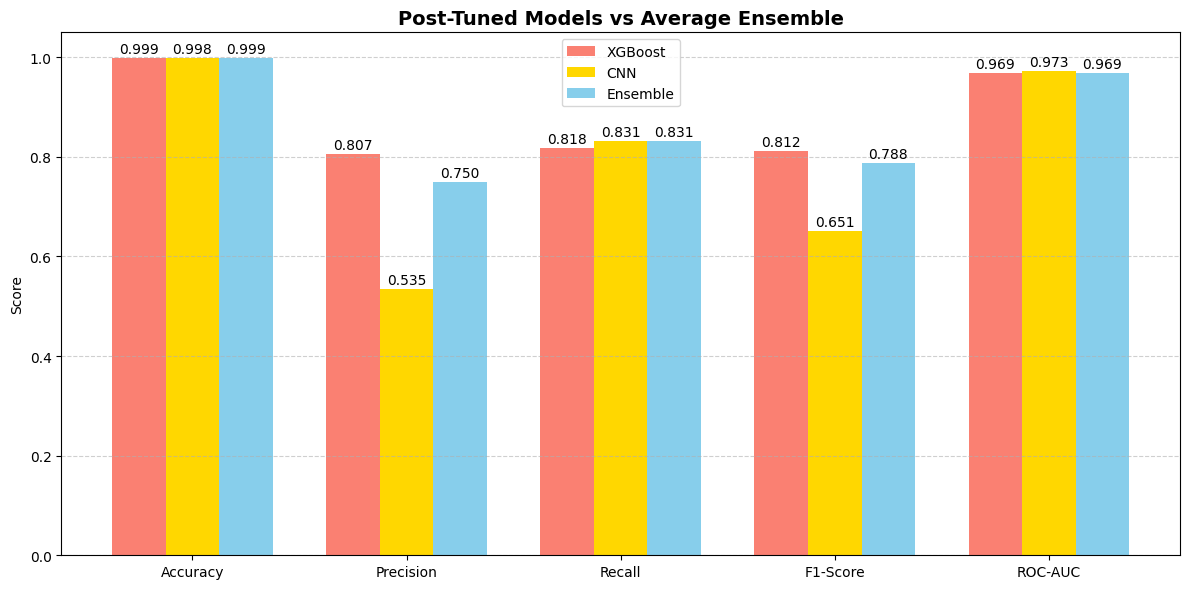

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----- Compute Average Ensemble Predictions -----
y_proba_ensemble = (y_proba_xgb_tuned + y_proba_cnn_best) / 2
y_pred_ensemble = (y_proba_ensemble > 0.5).astype(int)

# ----- Compute Ensemble Metrics -----
ensemble_acc = accuracy_score(y_test, y_pred_ensemble)
ensemble_prec = precision_score(y_test, y_pred_ensemble)
ensemble_rec = recall_score(y_test, y_pred_ensemble)
ensemble_f1 = f1_score(y_test, y_pred_ensemble)
ensemble_auc = roc_auc_score(y_test, y_proba_ensemble)

# ----- Create DataFrame for Post-Tuned Models vs Ensemble -----
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

comparison_df = pd.DataFrame({
    "Metric": metrics,
    "XGBoost (Post-Tuned)": [acc, prec, rec, f1, auc],
    "CNN (Post-Tuned)": [cnn_acc_post, cnn_prec_post, cnn_rec_post, cnn_f1_post, cnn_auc_post],
    "Ensemble (Average)": [ensemble_acc, ensemble_prec, ensemble_rec, ensemble_f1, ensemble_auc]
})

print("\nPost-Tuned Models vs Average Ensemble")
print(comparison_df.to_string(index=False))

# ----- Plot Bar Chart for Post-Tuned Models vs Ensemble -----
x = np.arange(len(metrics))
width = 0.25

plt.figure(figsize=(12,6))
plt.bar(x - width, comparison_df["XGBoost (Post-Tuned)"], width, label='XGBoost', color='salmon')
plt.bar(x, comparison_df["CNN (Post-Tuned)"], width, label='CNN', color='gold')
plt.bar(x + width, comparison_df["Ensemble (Average)"], width, label='Ensemble', color='skyblue')

# ----- Annotate bars with metric values -----
for i in range(len(metrics)):
    plt.text(i - width, comparison_df["XGBoost (Post-Tuned)"][i]+0.01, f"{comparison_df['XGBoost (Post-Tuned)'][i]:.3f}", ha='center')
    plt.text(i, comparison_df["CNN (Post-Tuned)"][i]+0.01, f"{comparison_df['CNN (Post-Tuned)'][i]:.3f}", ha='center')
    plt.text(i + width, comparison_df["Ensemble (Average)"][i]+0.01, f"{comparison_df['Ensemble (Average)'][i]:.3f}", ha='center')

# ----- Finalize Plot -----
plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Post-Tuned Models vs Average Ensemble", fontsize=14, weight='bold')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()